# import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Train Data

# 1) Problem Statement

Aim: Predict the airline passengers satisfaction.  

Problem statement: 
Predict whether the airline passengers are satisfied or not satisfied with the journey and service provided by airline as per the rating given by the passengers, also predict the factor that are highly correlated to the satisfied and dissatisfied for passenger.

Domain: Travel


# 2) Data Gathering

In [3]:
df = pd.read_csv('train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# 3) Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Identify the missing value

In [5]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [6]:
df_miss_value = pd.DataFrame({
    'Feature_name':df.columns,
    'Missing_values':df.isna().sum()
})
df_miss_value

,Feature_name,Missing_values
Unnamed: 0,Unnamed: 0,0
id,id,0
Gender,Gender,0
Customer Type,Customer Type,0
Age,Age,0
Type of Travel,Type of Travel,0
Class,Class,0
Flight Distance,Flight Distance,0
Inflight wifi service,Inflight wifi service,0
Departure/Arrival time convenient,Departure/Arrival time convenient,0


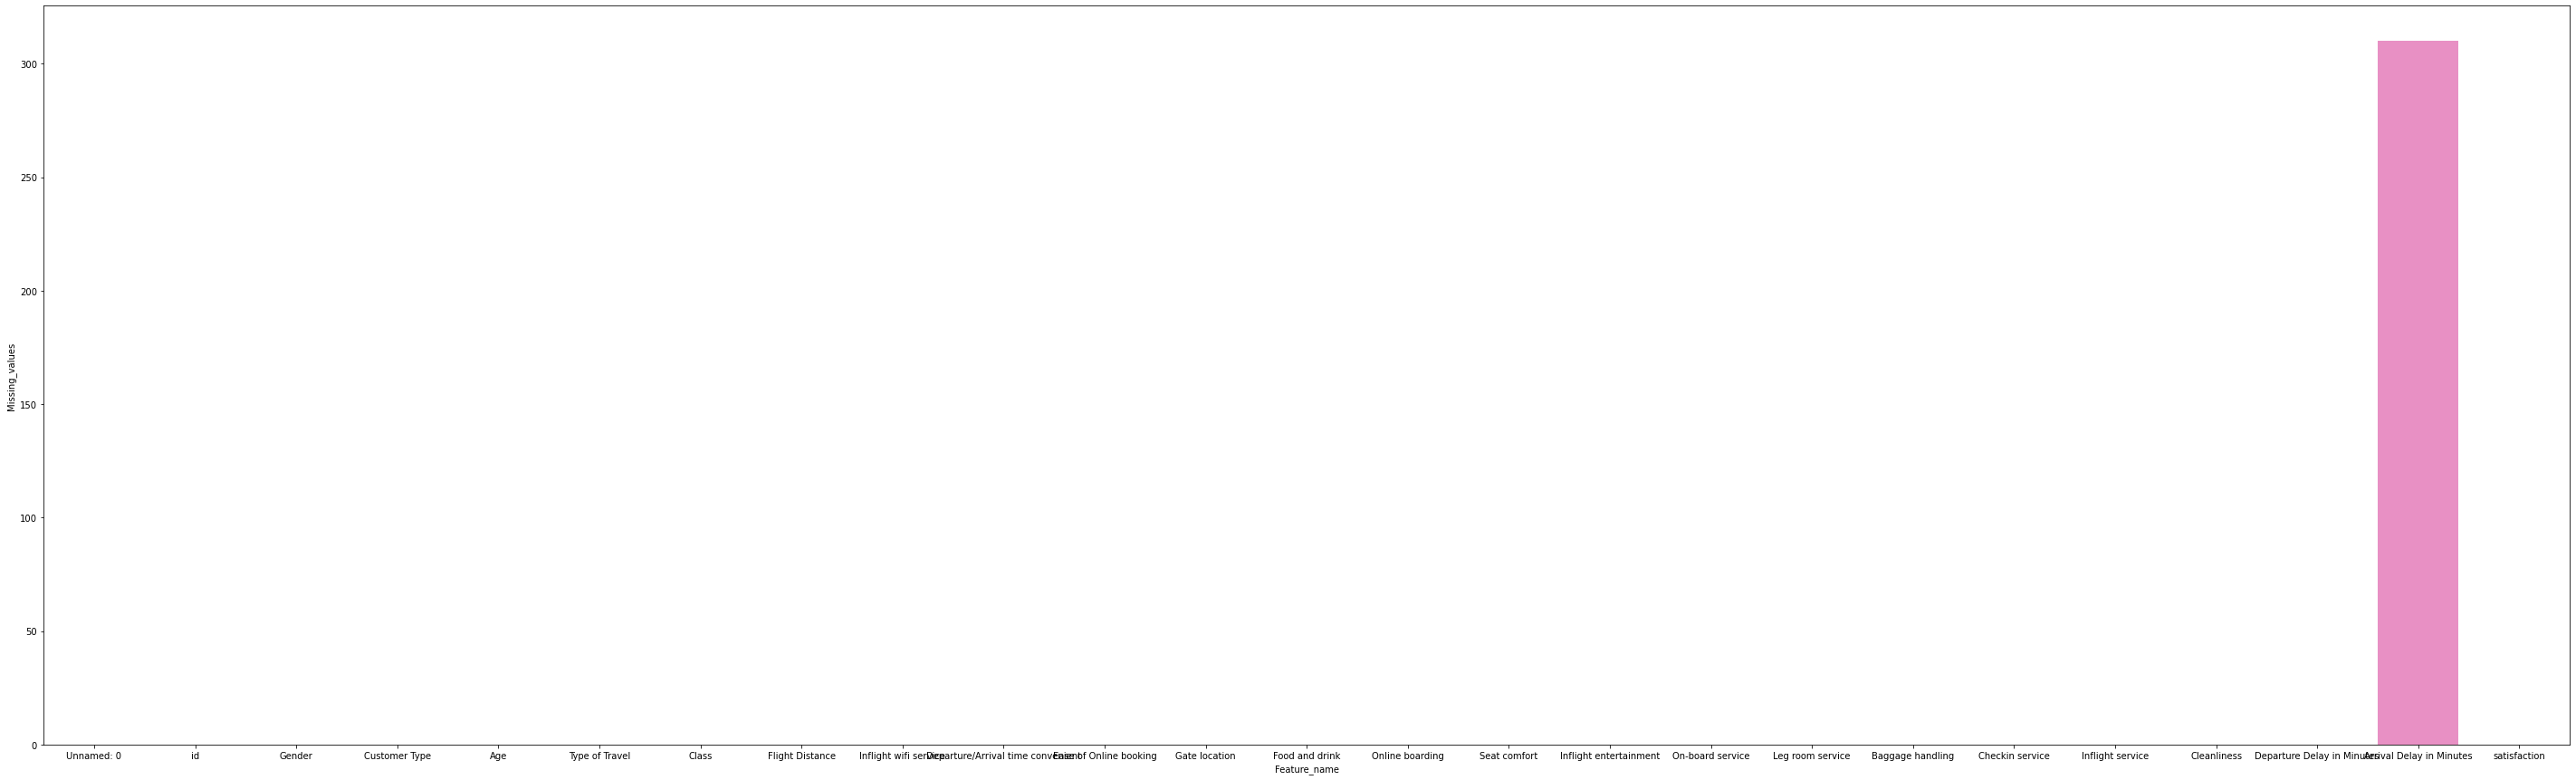

In [7]:
plt.figure(figsize=(50,15))
sns.barplot(x = df_miss_value.Feature_name,y=df_miss_value.Missing_values)
plt.show()

In [8]:
df['Arrival Delay in Minutes'].isna().sum()

310

In [9]:
Missing_value_features = [features for features in df.columns if df[f'{features}'].isna().sum()>0]
Missing_value_features

['Arrival Delay in Minutes']

- conclusion :
- Here only one feature (Arrival Delay in Minutes) having a null values and its a numerical feature

### 1) Target feature : satisfaction

In [10]:
df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

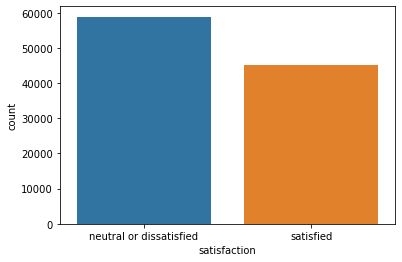

In [11]:
sns.countplot('satisfaction',data = df)
plt.show()

In [12]:
#conclusion :
#     1) Data is in object data type and its a binary class classifications. i.e [neutral or dissatisfied,satisfied]
#     2) Data is not inbalance.
#     3) There are 45025 people are satisfied and 58879 are not satisfied with the journey and service provided by airline

In [13]:
# Note : There is no need of Unnamed: 0 and id feature because it is not correlated with Target feature.

### 2) Gender

In [14]:
df.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

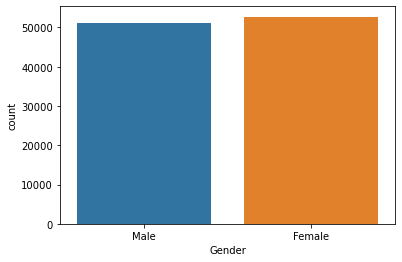

In [15]:
sns.countplot('Gender',data = df)
plt.show()

In [16]:
# Conclusion :
#     1) Gender features is in object data type and its binary class classification,i.e [Male and Female]
#     2) There are 52727 Female and 51177 Males are travelling with airlines.

### 3) Customer Type

In [17]:
df['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

<AxesSubplot:xlabel='Customer Type', ylabel='count'>

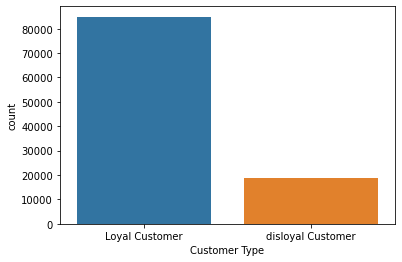

In [18]:
sns.countplot('Customer Type',data = df)

In [19]:
# conclusion : 
#     1) Customer Type features is in object data type and its binary class classification,i.e [Loyal Customer and disloyal              Customer].
#     2) There are 84923 are Loyal Customers and 18981 are disloyal Customers

### 4) Age

In [20]:
df.Age.describe()

count    103904.000000
mean         39.379706
std          15.114964
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

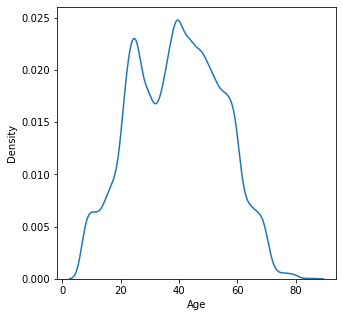

In [21]:
plt.figure(figsize=(5,5))
sns.kdeplot('Age',data = df)
plt.show()

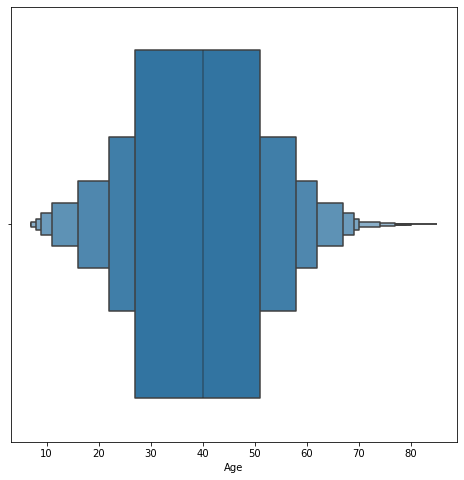

In [22]:
plt.figure(figsize=(8,8))
sns.boxenplot(df['Age'])
plt.show()

#### Hypothesis testing to check normality

In [23]:
# 1) Shapiro test

In [24]:
from scipy.stats import shapiro

In [25]:
def shapiro_test(df):
    stat,p_val = shapiro(df)
    print('p value is :',p_val)
    if p_val>=0.05:
        print('Data is normally distributed')
  
    else:
        print('Data is not normally distributed')

In [26]:
shapiro_test(df['Age'])

p value is : 0.0
Data is not normally distributed


check wether outliers are present in data or not

In [27]:
# z_score

In [28]:
def outliers_(df):
    outliers = []
    threshold = 3
    mean = np.mean(df)
    std_deviations = np.std(df)
    for x in df:
        z_score = (x-mean)/std_deviations
        if np.abs(z_score)>threshold:
            outliers.append(x)
            
    return outliers

In [29]:
outliers_(df['Age'])

[85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85, 85]

In [30]:
# conclusion :
#     1) On age column the data is not normally distributed.
#     2) Outliers are present in data.

### 5) Type of Travel

In [31]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

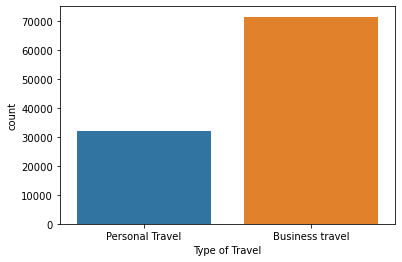

In [32]:
sns.countplot(df['Type of Travel'])
plt.show()

In [33]:
# conclusion :
#     1) 'Type of Travel' feature in object data type.
#     2) Here, 71655 peoples are travelling for business and 32249 peoples are travelling for personall trip.

### 6) Class

In [34]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

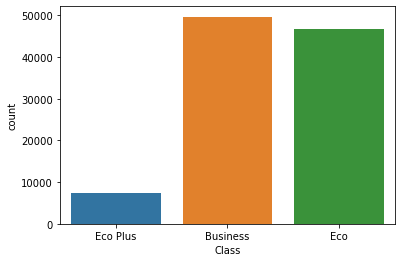

In [35]:
sns.countplot(df['Class'])
plt.show()

In [36]:
# conclusion:
#     1) Class feature are object data type and there are three class [Business,Eco,Eco Plus]

### 7) Flight Distance

In [37]:
df['Flight Distance'].describe()

count    103904.000000
mean       1189.448375
std         997.147281
min          31.000000
25%         414.000000
50%         843.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

In [38]:
shapiro_test(df['Flight Distance'])

p value is : 0.0
Data is not normally distributed


In [39]:
print(outliers_(df['Flight Distance']))

[4243, 4963, 4983, 4243, 4243, 4243, 4963, 4983, 4817, 4983, 4243, 4963, 4243, 4243, 4983, 4817, 4502, 4502, 4502, 4243, 4963, 4243, 4502, 4983, 4502, 4243, 4963, 4817, 4983, 4983, 4243, 4963, 4502, 4983, 4243, 4963, 4243, 4963, 4243, 4983, 4983, 4983, 4963, 4243, 4243, 4963, 4817, 4817, 4243, 4983, 4502, 4502, 4963, 4963, 4502, 4502, 4243, 4963]


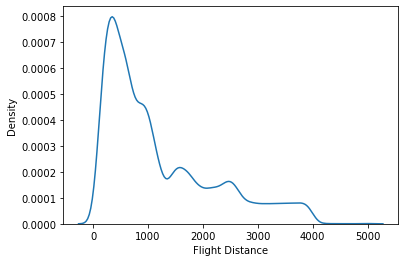

In [40]:
sns.kdeplot(df['Flight Distance'])
plt.show()

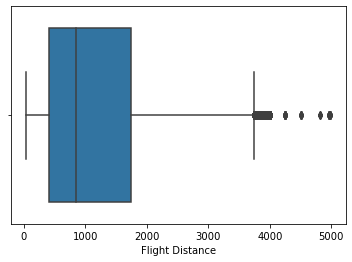

In [41]:
sns.boxplot(df['Flight Distance'])
plt.show()

In [42]:
# conclusion:
#     1) 'Flight Distance' is a numeric feature.
#     2) Outliers are present in data.
#     3) Data is not normally distributed.

### 8) Inflight wifi service

In [43]:
df['Inflight wifi service'].value_counts()

3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64

<AxesSubplot:xlabel='Inflight wifi service', ylabel='count'>

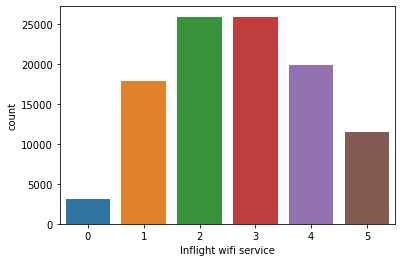

In [44]:
sns.countplot(df['Inflight wifi service'])

In [45]:
# conclusion :
#     1) 'Inflight wifi service' is a categorical feature.
#     2) There are 6 categories in 'Inflight wifi service', out of five peoples give the voting.

### 9) Departure/Arrival time convenient

In [46]:
df['Departure/Arrival time convenient'].value_counts()

4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64

<AxesSubplot:xlabel='Departure/Arrival time convenient', ylabel='count'>

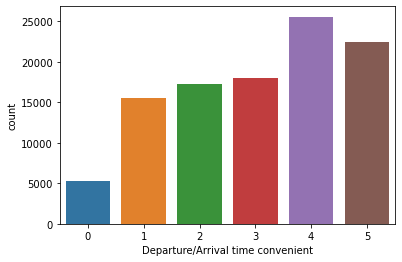

In [47]:
sns.countplot(df['Departure/Arrival time convenient'])

In [48]:
# conclusion :
#     1) 'Departure/Arrival time convenient' is a categorical feature.
#     2) There are 6 categories in 'Departure/Arrival time convenient', out of five peoples give the voting.

### 10) Ease of Online booking

In [49]:
df['Ease of Online booking'].value_counts()

3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64

<AxesSubplot:xlabel='Ease of Online booking', ylabel='count'>

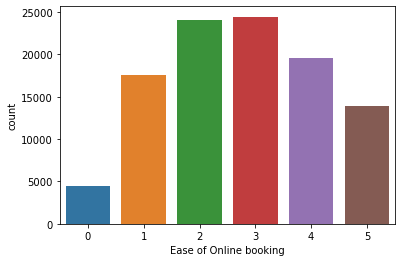

In [50]:
sns.countplot(df['Ease of Online booking'])

In [51]:
# conclusion :
#     1) 'Ease of Online booking' is a categorical feature.
#     2) There are 6 categories in 'Ease of Online booking', out of five peoples give the voting.

### 11) Gate location

In [52]:
df['Gate location'].value_counts()

3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64

<AxesSubplot:xlabel='Gate location', ylabel='count'>

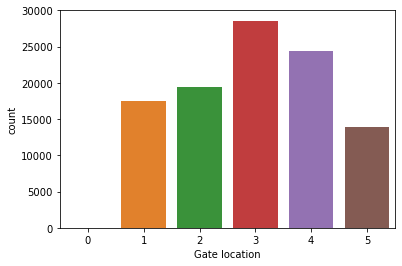

In [53]:
sns.countplot(df['Gate location'])

In [54]:
# conclusion :
#     1) 'Gate location' is a categorical feature.
#     2) There are 6 categories in 'Gate location', out of five peoples give the voting.

### 12) Food and drink

In [55]:
df['Food and drink'].value_counts()

4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64

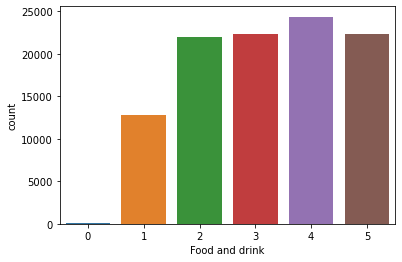

In [56]:
sns.countplot(df['Food and drink'])
plt.show()

In [57]:
# conclusion :
#     1) 'Food and drink' is a categorical feature.
#     2) There are 6 categories in 'Food and drink', out of five peoples give the voting.

### 13) Online boarding

In [58]:
df['Online boarding'].value_counts()

4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64

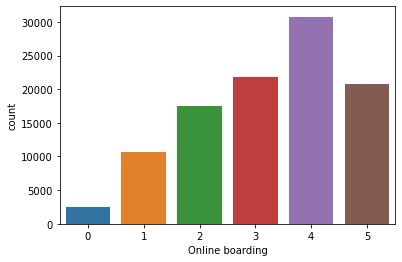

In [59]:
sns.countplot(df['Online boarding'])
plt.show()

In [60]:
# conclusion :
#     1) 'Online boarding' is a categorical feature.
#     2) There are 6 categories in 'Online boarding', out of five peoples give the voting.

### 14) Seat comfort

In [61]:
df['Seat comfort'].value_counts()

4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64

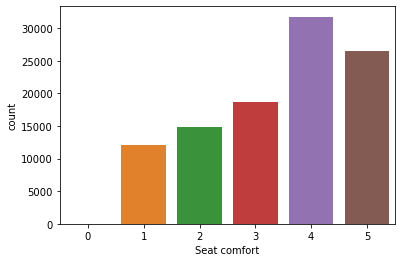

In [62]:
sns.countplot(df['Seat comfort'])
plt.show()

In [63]:
# conclusion :
#     1) 'Seat comfort' is a categorical feature.
#     2) There are 6 categories in 'Seat comfort', out of five peoples give the voting.

### 15) Inflight entertainment

In [64]:
df['Inflight entertainment'].value_counts()

4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64

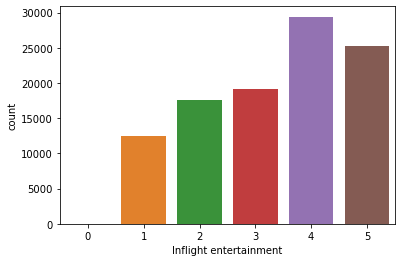

In [65]:
sns.countplot(df['Inflight entertainment'])
plt.show()

In [66]:
# conclusion :
#     1) 'Inflight entertainment' is a categorical feature.
#     2) There are 6 categories in 'Inflight entertainment', out of five peoples give the voting.

### 16) On-board service

In [67]:
df['On-board service'].value_counts()

4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64

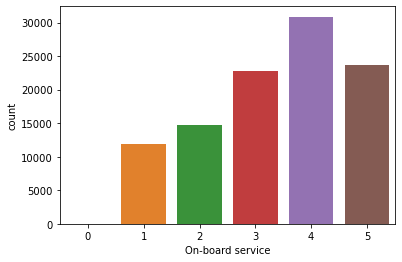

In [68]:
sns.countplot(df['On-board service'])
plt.show()

In [69]:
# conclusion :
#     1) 'Seat comfort' is a categorical feature.
#     2) There are 6 categories in 'Seat comfort', out of five peoples give the voting.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### 17) Leg room service

In [71]:
df['Leg room service'].value_counts()

4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64

<AxesSubplot:xlabel='Leg room service', ylabel='count'>

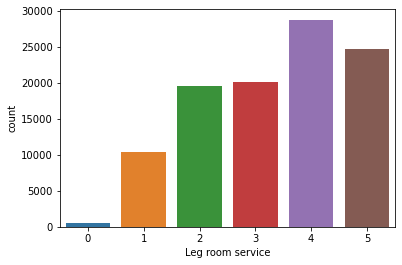

In [72]:
sns.countplot(df['Leg room service'])

In [73]:
# conclusion :
#     1) 'Leg room service' is a categorical feature.
#     2) There are 6 categories in 'Leg room service', out of five peoples give the voting.

### 18) Baggage handling

In [74]:
df['Baggage handling'].value_counts()

4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64

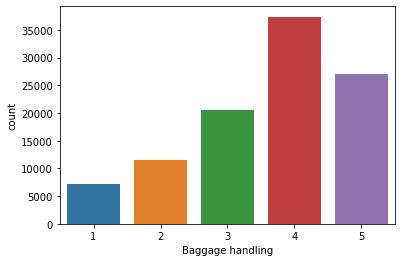

In [75]:
sns.countplot(df['Baggage handling'])
plt.show()

In [76]:
# conclusion :
#     1) 'Baggage handling' is a categorical feature.
#     2) There are 6 categories in 'Baggage handling', out of five peoples give the voting.

### 19) Checkin service

In [77]:
df['Checkin service'].value_counts()

4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64

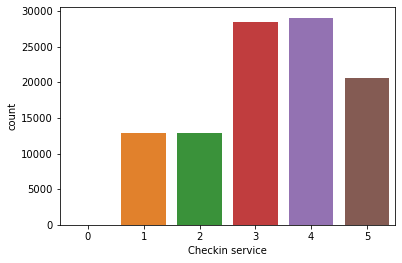

In [78]:
sns.countplot(df['Checkin service'])
plt.show()

In [79]:
# conclusion :
#     1) 'Checkin service' is a categorical feature.
#     2) There are 6 categories in 'Checkin service', out of five peoples give the voting.

### 20) Inflight service

In [80]:
df['Inflight service'].value_counts()

4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64

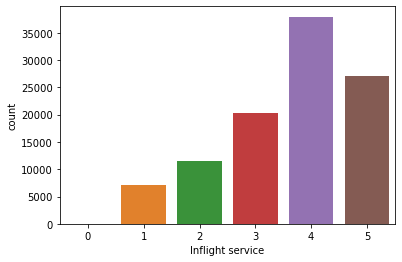

In [81]:
sns.countplot(df['Inflight service'])
plt.show()

In [82]:
# conclusion :
#     1) 'Inflight service' is a categorical feature.
#     2) There are 6 categories in 'Inflight service', out of five peoples give the voting.

### 21) Cleanliness

In [83]:
df['Cleanliness'].value_counts()

4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64

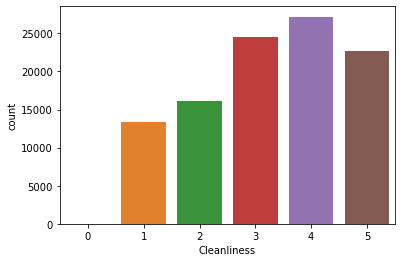

In [84]:
sns.countplot(df['Cleanliness'])
plt.show()

In [85]:
# conclusion :
#     1) 'Cleanliness' is a categorical feature.
#     2) There are 6 categories in 'Cleanliness', out of five peoples give the voting.

### 22) Departure Delay in Minutes

In [86]:
df['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:xlabel='Departure Delay in Minutes'>

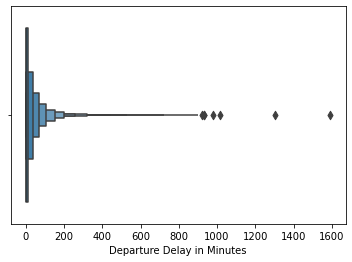

In [87]:
sns.boxenplot(df['Departure Delay in Minutes'])

In [88]:
print(len(outliers_(df['Departure Delay in Minutes'])))

2222


In [89]:
shapiro_test(df['Departure Delay in Minutes'])

p value is : 0.0
Data is not normally distributed


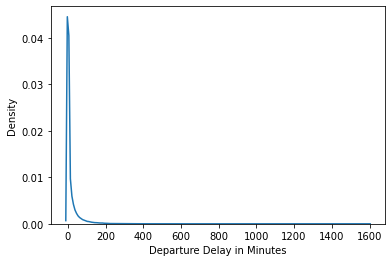

In [90]:
sns.kdeplot(df['Departure Delay in Minutes'])
plt.show()

In [91]:
# conclusion:
#     1) 'Departure Delay in Minutes' is a numeric feature.
#     2) Data is not normally distributed.
#     3) Outliers are present in the data.

### 23) Arrival Delay in Minutes

In [92]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

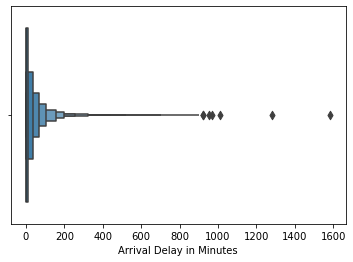

In [93]:
sns.boxenplot(df['Arrival Delay in Minutes'])

In [94]:
len(outliers_(df['Arrival Delay in Minutes']))

2225

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Density'>

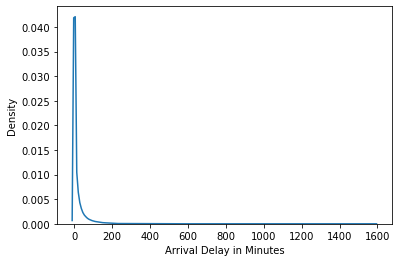

In [95]:
sns.kdeplot(df['Arrival Delay in Minutes'])

In [96]:
df['Arrival Delay in Minutes'].isna().sum()

310

In [97]:
# conclusion:
#     1) 'Arrival Delay in Minutes' is a numerical feature.
#     2) Data is not normally distributed.
#     3) 310 missing value.
#     4) Outliers are present in data.

In [98]:
df.corr()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Unnamed: 0,1.000000,0.002991,0.004786,0.002794,-0.002490,0.000739,0.001913,0.005073,-0.002162,0.001002,0.000044,0.001363,0.000813,0.004052,-0.000526,-0.004321,-0.000134,-0.001117,-0.000045,-0.000045
id,0.002991,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.037254
Age,0.004786,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012147
Flight Distance,0.002794,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002426
Inflight wifi service,-0.002490,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019095
Departure/Arrival time convenient,0.000739,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000864
Ease of Online booking,0.001913,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007984
Gate location,0.005073,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005143
Food and drink,-0.002162,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032524
Online boarding,0.001002,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021949


# 4) Feature Engineering

In [99]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [100]:
x = df.drop('satisfaction',axis=1)
y = df['satisfaction']

### train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1,stratify=y)

In [102]:
x_train.shape

(83123, 24)

In [103]:
x_test.shape

(20781, 24)

In [104]:
y_test.shape

(20781,)

In [105]:
y_train.shape

(83123,)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### 1) Gender

In [107]:
x_train['Gender'].replace({'Male':1,'Female':0},inplace=True)
x_test['Gender'].replace({'Male':1,'Female':0},inplace=True)

### 2) Customer Type

In [108]:
x_train['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0},inplace=True)
x_test['Customer Type'].replace({'Loyal Customer':1,'disloyal Customer':0},inplace=True)

### 3) Type of Travel

In [109]:
df['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [110]:
x_train['Type of Travel'].replace({'Business travel':0,'Personal Travel':1},inplace=True)
x_test['Type of Travel'].replace({'Business travel':0,'Personal Travel':1},inplace=True)

### 4) Age

In [111]:
x_test['Age'] = np.sqrt(x_test['Age'])
x_test['Age']

49176    3.741657
78503    7.549834
1554     5.000000
81978    4.123106
71618    4.795832
           ...   
7427     8.000000
73883    6.557439
35517    7.348469
3413     5.196152
87387    4.795832
Name: Age, Length: 20781, dtype: float64

In [112]:
outliers_(x_test['Age'])

[]

In [113]:
x_train['Age'] = np.sqrt(x_train['Age'])
x_train['Age']

102865    7.416198
80418     5.830952
93600     4.795832
11563     6.708204
58399     7.211103
            ...   
31549     6.633250
92276     3.162278
8983      6.164414
58327     7.549834
82570     7.937254
Name: Age, Length: 83123, dtype: float64

In [114]:
outliers_(x_train['Age'])

[]

### 5) Class

In [115]:
df['Class'].value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

In [116]:
x_train['Class'].replace({'Business':0,'Eco':1,'Eco Plus':2},inplace=True)
x_test['Class'].replace({'Business':0,'Eco':1,'Eco Plus':2},inplace=True)

In [117]:
x_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
49176,49176,89922,1,0,3.741657,0,1,1310,1,1,...,1,4,1,1,3,2,3,4,11,9.0
78503,78503,47236,1,1,7.549834,1,2,954,3,3,...,2,2,3,3,3,1,3,2,0,11.0
1554,1554,31441,1,1,5.000000,0,1,1541,0,5,...,2,2,5,1,1,3,2,2,28,22.0
81978,81978,17033,0,1,4.123106,0,2,781,5,2,...,5,5,1,4,2,2,3,5,0,0.0
71618,71618,41779,1,1,4.795832,0,0,2086,4,4,...,4,4,4,3,4,5,2,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,7427,50586,1,1,8.000000,1,1,86,3,4,...,2,2,3,4,4,5,4,2,0,0.0
73883,73883,9949,0,1,6.557439,0,0,357,2,2,...,5,2,2,2,2,4,2,4,0,0.0
35517,35517,64606,0,1,7.348469,0,0,190,3,3,...,5,4,4,4,4,3,4,5,0,0.0
3413,3413,57003,1,1,5.196152,1,1,2454,4,5,...,3,3,5,5,5,3,5,3,7,0.0


### 6) Flight Distance

In [118]:
x_train['Flight Distance'] = np.sqrt(x_train['Flight Distance'])

In [119]:
outliers_(x_train['Flight Distance'])

[]

In [120]:
x_test['Flight Distance'] = np.sqrt(x_test['Flight Distance'])

In [121]:
outliers_(x_test['Flight Distance'])

[]

### 7) Departure Delay in Minutes

In [122]:
x_train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

<AxesSubplot:xlabel='Departure Delay in Minutes', ylabel='Density'>

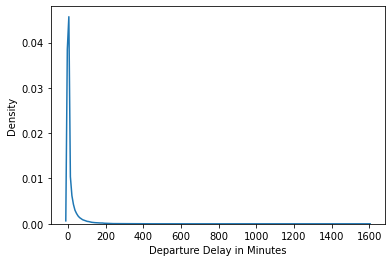

In [123]:
sns.kdeplot(x_train['Departure Delay in Minutes'])

<AxesSubplot:xlabel='Departure Delay in Minutes'>

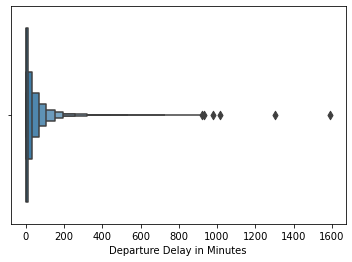

In [124]:
sns.boxenplot(x_train['Departure Delay in Minutes'])

In [125]:
def iqr_methode(df,columns):
    q1 = np.quantile(df[columns],0.25)
    q2 = np.quantile(df[columns],0.50)
    q3 = np.quantile(df[columns],0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    print('IQR = ',iqr)
    print('lower tail = ',lower_tail)
    print('upper tail = ',upper_tail)

In [126]:
iqr_methode(x_train,'Departure Delay in Minutes')

IQR =  12.0
lower tail =  -18.0
upper tail =  30.0


In [127]:
x_train['Departure Delay in Minutes'] = np.cbrt(x_train['Departure Delay in Minutes'])

In [128]:
iqr_methode(x_train,'Departure Delay in Minutes')

IQR =  2.2894284851066637
lower tail =  -3.434142727659996
upper tail =  5.723571212766659


In [129]:
x_train.loc[x_train['Departure Delay in Minutes'] >= 5.723571212766659, 'Departure Delay in Minutes'] = x_train.loc[(x_train['Departure Delay in Minutes'] < 5.723571212766659), 'Departure Delay in Minutes'].median()
x_train.loc[x_train['Departure Delay in Minutes'] <= -3.434142727659996, 'Departure Delay in Minutes'] = 0

<AxesSubplot:xlabel='Departure Delay in Minutes'>

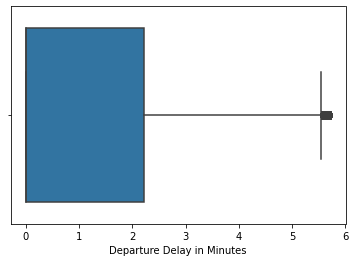

In [130]:
sns.boxplot(x_train['Departure Delay in Minutes'])

In [131]:
x_test['Departure Delay in Minutes'] = np.cbrt(x_test['Departure Delay in Minutes'])

In [132]:
iqr_methode(x_test,'Departure Delay in Minutes')

IQR =  2.2894284851066637
lower tail =  -3.434142727659996
upper tail =  5.723571212766659


In [133]:
x_test.loc[x_test['Departure Delay in Minutes'] >= 5.723571212766659, 'Departure Delay in Minutes'] = x_test.loc[(x_test['Departure Delay in Minutes'] < 5.723571212766659), 'Departure Delay in Minutes'].median()
x_test.loc[x_test['Departure Delay in Minutes'] <= -3.434142727659996, 'Departure Delay in Minutes'] = 0

<AxesSubplot:xlabel='Departure Delay in Minutes'>

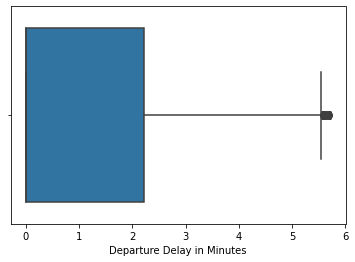

In [134]:
sns.boxplot(x_test['Departure Delay in Minutes'])

## 8) Arrival Delay in Minutes

In [135]:
x_train['Arrival Delay in Minutes'].isna().sum()

241

In [136]:
x_train['Arrival Delay in Minutes'].fillna(x_train['Arrival Delay in Minutes'].median(),inplace=True)

In [137]:
x_train['Arrival Delay in Minutes'].isna().sum()

0

In [138]:
x_test['Arrival Delay in Minutes'].isna().sum()

69

In [139]:
x_test['Arrival Delay in Minutes'].fillna(x_test['Arrival Delay in Minutes'].median(),inplace=True)

In [140]:
x_test['Arrival Delay in Minutes'].isna().sum()

0

In [141]:
x_train['Arrival Delay in Minutes'] = np.cbrt(x_train['Arrival Delay in Minutes'])

In [142]:
iqr_methode(x_train,'Arrival Delay in Minutes')

IQR =  2.3513346877207573
lower tail =  -3.527002031581136
upper tail =  5.878336719301894


In [143]:
x_train.loc[x_train['Arrival Delay in Minutes'] >= 5.878336719301894, 'Arrival Delay in Minutes'] = x_train.loc[(x_train['Departure Delay in Minutes'] < 5.878336719301894), 'Arrival Delay in Minutes'].median()
x_train.loc[x_train['Arrival Delay in Minutes'] <= -3.527002031581136, 'Arrival Delay in Minutes'] = 0

In [144]:
x_test['Arrival Delay in Minutes'] = np.cbrt(x_test['Arrival Delay in Minutes'])

In [145]:
iqr_methode(x_test,'Arrival Delay in Minutes')

IQR =  2.3513346877207573
lower tail =  -3.527002031581136
upper tail =  5.878336719301894


In [146]:
x_test.loc[x_test['Arrival Delay in Minutes'] >= 5.878336719301894, 'Arrival Delay in Minutes'] = x_test.loc[(x_test['Departure Delay in Minutes'] < 5.878336719301894), 'Arrival Delay in Minutes'].median()
x_test.loc[x_test['Arrival Delay in Minutes'] <= -3.527002031581136, 'Arrival Delay in Minutes'] = 0

### 9) satisfaction

In [147]:
y_train.value_counts()

neutral or dissatisfied    47103
satisfied                  36020
Name: satisfaction, dtype: int64

In [148]:
y_train.replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)
y_test.replace({'neutral or dissatisfied':0,'satisfied':1},inplace=True)

In [149]:
y_test.head(1)

49176    0
Name: satisfaction, dtype: int64

In [150]:
y_train.head(1)

102865    1
Name: satisfaction, dtype: int64

# 5) Feature selections

In [151]:
train_data = pd.concat([x_train, pd.Series(y_train, name='satisfaction')], axis=1)
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
102865,102865,115128,0,1,7.416198,0,0,17.204651,1,1,...,5,5,5,5,3,5,5,0.000000,0.000000,1
80418,80418,129035,1,1,5.830952,0,0,42.965102,3,2,...,3,3,3,3,1,3,1,3.659306,3.141381,0
93600,93600,29071,0,1,4.795832,1,1,25.922963,1,4,...,4,5,4,4,4,5,4,0.000000,0.000000,0
11563,11563,105589,1,1,6.708204,1,1,24.020824,2,4,...,2,5,2,5,3,5,2,0.000000,0.000000,0
58399,58399,68143,0,1,7.211103,0,0,62.104750,3,3,...,5,5,5,5,3,5,4,0.000000,0.000000,1


In [152]:
train_data.corr().T

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Unnamed: 0,1.000000,0.003913,0.002236,0.001544,0.002502,0.000231,-0.001505,0.003420,-0.004243,0.000914,...,0.002863,0.001384,0.003875,0.000424,-0.003809,0.001438,-0.000800,-0.006872,-0.005066,-0.003562
id,0.003913,1.000000,-0.001014,-0.000505,0.020915,-0.000141,-0.105514,0.118674,-0.016798,-0.000312,...,0.005617,0.056063,0.044114,0.075778,0.079476,0.080323,0.025333,0.045832,-0.008829,0.013897
Gender,0.002236,-0.001014,1.000000,0.030853,0.008457,0.006152,-0.013537,0.006523,0.007216,0.009580,...,0.006491,0.006912,0.032494,0.036561,0.010311,0.039612,0.007240,0.000361,-0.002294,0.012791
Customer Type,0.001544,-0.000505,0.030853,1.000000,0.266286,0.307927,-0.041181,0.215238,0.007230,0.208008,...,0.111335,0.054536,0.047698,-0.026524,0.029973,-0.022940,0.084525,-0.005025,-0.006042,0.188273
Age,0.002502,0.020915,0.008457,0.266286,1.000000,-0.086819,-0.140793,0.095119,0.021934,0.026476,...,0.085048,0.061305,0.050052,-0.041408,0.038584,-0.044536,0.059738,-0.011102,-0.013025,0.156946
Type of Travel,0.000231,-0.000141,0.006152,0.307927,-0.086819,1.000000,0.488353,-0.251070,-0.104942,0.259031,...,-0.147726,-0.057534,-0.139139,-0.032706,0.015786,-0.023396,-0.078247,-0.001159,-0.004083,-0.447136
Class,-0.001505,-0.105514,-0.013537,-0.041181,-0.140793,0.488353,1.000000,-0.412300,-0.025077,0.089024,...,-0.180351,-0.209885,-0.198062,-0.162757,-0.155419,-0.158439,-0.126785,0.007639,0.022704,-0.447842
Flight Distance,0.003420,0.118674,0.006523,0.215238,0.095119,-0.251070,-0.412300,1.000000,0.010235,-0.009626,...,0.121541,0.106649,0.131033,0.064300,0.074719,0.059986,0.090587,0.013177,-0.005491,0.284295
Inflight wifi service,-0.004243,-0.016798,0.007216,0.007230,0.021934,-0.104942,-0.025077,0.010235,1.000000,0.346527,...,0.208960,0.124647,0.160906,0.123835,0.048502,0.112488,0.131345,-0.030431,-0.037558,0.285644
Departure/Arrival time convenient,0.000914,-0.000312,0.009580,0.208008,0.026476,0.259031,0.089024,-0.009626,0.346527,1.000000,...,-0.005309,0.068695,0.011178,0.070246,0.095089,0.072207,0.013781,-0.001768,-0.003238,-0.048956


<AxesSubplot:>

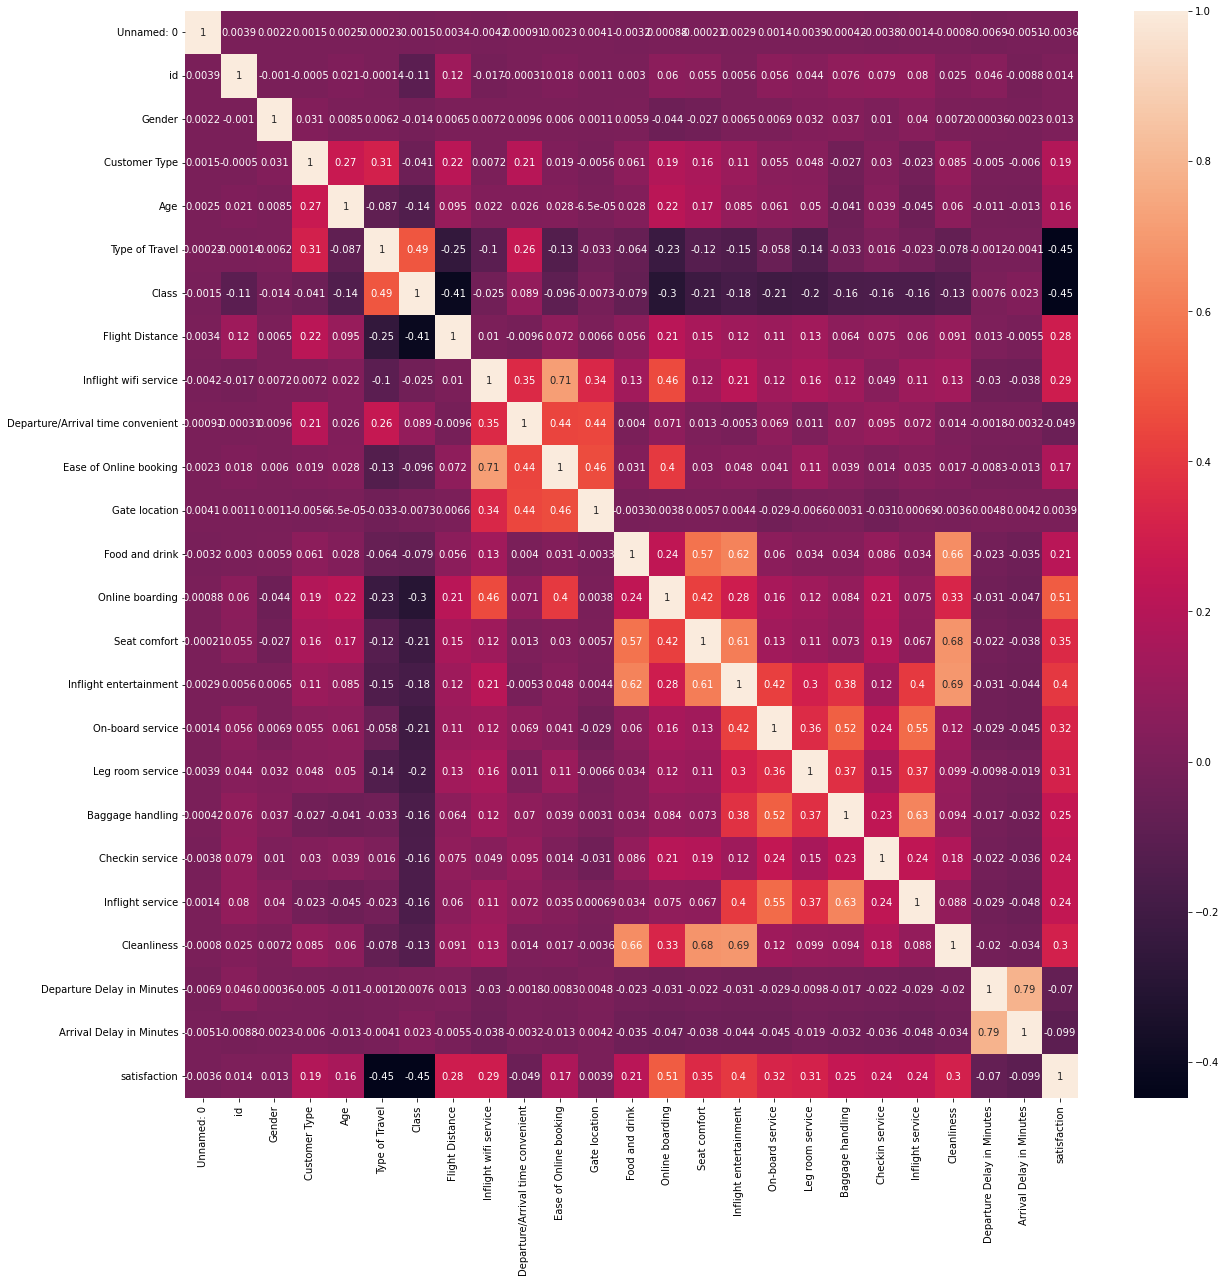

In [153]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(),annot=True)

In [156]:
x_train.drop(['Unnamed: 0','id','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes',
                'Arrival Delay in Minutes'],axis=1,inplace=True)

In [157]:
x_test.drop(['Unnamed: 0','id','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes',
                'Arrival Delay in Minutes'],axis=1,inplace=True)

In [159]:
len(x_train.columns)

18

In [160]:
len(x_test.columns)

18

# 6) Model Training

### 1) Logistic regression

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [163]:
y_pred_log_test = log_model.predict(x_test)
y_pred_log_train = log_model.predict(x_train)
print('accuracy score of test : ',accuracy_score(y_test,y_pred_log_test))
print('accuracy score of train : ',accuracy_score(y_train,y_pred_log_train))
print('confusion matrix : \n',confusion_matrix(y_test,y_pred_log_test))
print('classification report :\n',classification_report(y_test,y_pred_log_test))

accuracy score of test :  0.8749819546701314
accuracy score of train :  0.8736932016409418
confusion matrix : 
 [[10670  1106]
 [ 1492  7513]]
classification report :
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     11776
           1       0.87      0.83      0.85      9005

    accuracy                           0.87     20781
   macro avg       0.87      0.87      0.87     20781
weighted avg       0.87      0.87      0.87     20781



In [164]:
Logistic_regression_train = accuracy_score(y_train,y_pred_log_train)
Logistic_regression_test = accuracy_score(y_test,y_pred_log_test)

### 2) Decision tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [167]:
y_pred_DT = DT_model.predict(x_test)
y_pred_DT_train = DT_model.predict(x_train)
print('confusion matrix : \n',confusion_matrix(y_test,y_pred_DT))
print('classification report :\n',classification_report(y_test,y_pred_DT))
print('accuracy score : ',accuracy_score(y_test,y_pred_DT))
print('accuracy score of train : ',accuracy_score(y_train,y_pred_DT_train))

confusion matrix : 
 [[11167   609]
 [  593  8412]]
classification report :
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     11776
           1       0.93      0.93      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

accuracy score :  0.9421587026610846
accuracy score of train :  1.0


In [168]:
hyperparameters = {'criterion' : ['gini','entropy'],
                   'max_depth' : np.arange(2,10),
                   'min_samples_split' : np.arange(2,15),
                   'min_samples_leaf' : np.arange(1,15)}
dt_model = DecisionTreeClassifier()
rscv_dt_model = RandomizedSearchCV(dt_model,hyperparameters,cv = 5)
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [169]:
rscv_dt_model.best_params_

{'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_depth': 9,
 'criterion': 'entropy'}

In [170]:
best_DT_model = DecisionTreeClassifier(max_depth = 2,
                                   min_samples_leaf = 3,
                                   min_samples_split = 7)
best_DT_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=7)

In [171]:
y_pred_DT_test_best = best_DT_model.predict(x_test)
y_pred_DT_train_best = best_DT_model.predict(x_train)
print('confusion matrix : \n',confusion_matrix(y_test,y_pred_DT_test_best))
print('classification report :\n',classification_report(y_test,y_pred_DT_test_best))
print('accuracy score : ',accuracy_score(y_test,y_pred_DT_test_best))
print('accuracy score of train : ',accuracy_score(y_train,y_pred_DT_train_best))

confusion matrix : 
 [[10580  1196]
 [ 1710  7295]]
classification report :
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     11776
           1       0.86      0.81      0.83      9005

    accuracy                           0.86     20781
   macro avg       0.86      0.85      0.86     20781
weighted avg       0.86      0.86      0.86     20781

accuracy score :  0.86016072373803
accuracy score of train :  0.8604718309011946


In [172]:
Decision_tree_train = accuracy_score(y_train,y_pred_DT_train_best)
Decision_tree_test = accuracy_score(y_test,y_pred_DT_test_best)

### 3) Random forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

In [174]:
RF_model = RandomForestClassifier(random_state=10)
RF_model.fit(x_train,y_train)

RandomForestClassifier(random_state=10)

In [175]:
y_pred_RF_test = RF_model.predict(x_test)
y_pred_RF_train = RF_model.predict(x_train)
print('confusion matrix : \n',confusion_matrix(y_test,y_pred_RF_test))
print('classification report :\n',classification_report(y_test,y_pred_RF_test))
print('accuracy score : ',accuracy_score(y_test,y_pred_RF_test))
print('accuracy score of train : ',accuracy_score(y_train,y_pred_RF_train))

confusion matrix : 
 [[11562   214]
 [  557  8448]]
classification report :
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11776
           1       0.98      0.94      0.96      9005

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

accuracy score :  0.9628988017900967
accuracy score of train :  1.0


In [176]:
hyp = {'n_estimators' : np.arange(10,100),
       'max_depth' : np.arange(1,10),
       'min_samples_leaf' : np.arange(1,10),
       'min_samples_split' : np.arange(2,10),
       'criterion' : ['gini','entropy']}

rf_clf = RandomForestClassifier(random_state=10)
rscv_rf_clf = RandomizedSearchCV(rf_clf, hyp, cv = 5)
rscv_rf_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [177]:
rscv_rf_clf.best_params_

{'n_estimators': 95,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 7,
 'criterion': 'gini'}

In [178]:
best_RF_model = RandomForestClassifier(n_estimators=62,min_samples_split = 5,min_samples_leaf=8,max_depth=9,criterion = 'entropy')
best_RF_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=8,
                       min_samples_split=5, n_estimators=62)

In [179]:
y_pred_RF_test = best_RF_model.predict(x_test)
y_pred_RF_train = best_RF_model.predict(x_train)
print('confusion matrix : \n',confusion_matrix(y_test,y_pred_RF_test))
print('classification report :\n',classification_report(y_test,y_pred_RF_test))
print('accuracy score : ',accuracy_score(y_test,y_pred_RF_test))
print('accuracy score of train : ',accuracy_score(y_train,y_pred_RF_train))

confusion matrix : 
 [[11223   553]
 [  686  8319]]
classification report :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     11776
           1       0.94      0.92      0.93      9005

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781

accuracy score :  0.9403782301140465
accuracy score of train :  0.9405820290413003


In [180]:
Random_forest_train = accuracy_score(y_train,y_pred_RF_train)
Random_forest_test = accuracy_score(y_test,y_pred_RF_test)

### 4) Adaboost

In [181]:
from sklearn.ensemble import AdaBoostClassifier

In [182]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_train,y_train)

AdaBoostClassifier()

In [183]:
y_pred_AB_test = AB_model.predict(x_test)
y_pred_AB_train = AB_model.predict(x_train)
print('confusion matrix : \n',confusion_matrix(y_test,y_pred_AB_test))
print('classification report :\n',classification_report(y_test,y_pred_AB_test))
print('accuracy score : ',accuracy_score(y_test,y_pred_AB_test))
print('accuracy score of train : ',accuracy_score(y_train,y_pred_AB_train))

confusion matrix : 
 [[11120   656]
 [  867  8138]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     11776
           1       0.93      0.90      0.91      9005

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781

accuracy score :  0.9267119002935373
accuracy score of train :  0.9247500691745967


In [184]:
Adaboost_train = accuracy_score(y_train,y_pred_AB_train)
Adaboost_test = accuracy_score(y_test,y_pred_AB_test)

In [185]:
score_df = pd.DataFrame()

In [186]:
Logistic_regression_train = accuracy_score(y_train,y_pred_log_train)
Logistic_regression_test = accuracy_score(y_test,y_pred_log_test)

Decision_tree_train = accuracy_score(y_train,y_pred_DT_train_best)
Decision_tree_test = accuracy_score(y_test,y_pred_DT_test_best)

Random_forest_train = accuracy_score(y_train,y_pred_RF_train)
Random_forest_test = accuracy_score(y_test,y_pred_RF_test)

Adaboost_train = accuracy_score(y_train,y_pred_AB_train)
Adaboost_test = accuracy_score(y_test,y_pred_AB_test)

In [187]:
score_df['Algorithm_Name'] = ['Logistic_Regresion','Decision_Tree','Random_Forest','Adaboost']
score_df['Training_accuracy'] = [Logistic_regression_train,Decision_tree_train,Random_forest_train,Adaboost_train]
score_df['Test_accuracy'] = [Logistic_regression_test,Decision_tree_test,Random_forest_test,Adaboost_test]

In [188]:
score_df

,Algorithm_Name,Training_accuracy,Test_accuracy
0,Logistic_Regresion,0.873693,0.874982
1,Decision_Tree,0.860472,0.860161
2,Random_Forest,0.940582,0.940378
3,Adaboost,0.924750,0.926712


In [189]:
RF_model.predict(x_test.head())

array([0, 0, 1, 1, 1], dtype=int64)

In [190]:
x_test.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service', 'Ease of Online booking',
       'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [192]:
x_test.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
49176,1,0,3.741657,0,1,36.193922,1,1,4,1,1,4,1,1,3,2,3,4


In [195]:
def predct_satisfaction(Gender, Customer_Type, Age, Type_of_Travel, Class,
       Flight_Distance, Inflight_wifi_service, Ease_of_Online_booking,
       Food_and_drink, Online_boarding, Seat_comfort,
       Inflight_entertainment, On_board_service, Leg_room_service,
       Baggage_handling, Checkin_service, Inflight_service,
       Cleanliness):
    pred1 = RF_model.predict([[Gender, Customer_Type, Age, Type_of_Travel, Class,
       Flight_Distance, Inflight_wifi_service, Ease_of_Online_booking,
       Food_and_drink, Online_boarding, Seat_comfort,
       Inflight_entertainment, On_board_service, Leg_room_service,
       Baggage_handling, Checkin_service, Inflight_service,
       Cleanliness]])
    return pred1

In [197]:
predct_satisfaction(1,0,3.8,0,1,37.0,1,1,4,1,1,4,1,1,3,2,3,4)

array([0], dtype=int64)

In [199]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20781 entries, 49176 to 87387
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  20781 non-null  int64  
 1   Customer Type           20781 non-null  int64  
 2   Age                     20781 non-null  float64
 3   Type of Travel          20781 non-null  int64  
 4   Class                   20781 non-null  int64  
 5   Flight Distance         20781 non-null  float64
 6   Inflight wifi service   20781 non-null  int64  
 7   Ease of Online booking  20781 non-null  int64  
 8   Food and drink          20781 non-null  int64  
 9   Online boarding         20781 non-null  int64  
 10  Seat comfort            20781 non-null  int64  
 11  Inflight entertainment  20781 non-null  int64  
 12  On-board service        20781 non-null  int64  
 13  Leg room service        20781 non-null  int64  
 14  Baggage handling        20781 non-

In [202]:
import pickle
import os

In [204]:
model_folder_path = 'model'
if not os.path.exists(model_folder_path):
    os.mkdir(model_folder_path)

pickle.dump(RF_model,open(f'{model_folder_path}/model.pkl','wb'))